In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../"*2)
import warnings
warnings.filterwarnings('ignore')

In [3]:
from quantumnetworks import DoubleModeSystem, plot_full_evolution
import numpy as np

[[-1.5e-03  1.0e+00  0.0e+00  2.0e-03]
 [-1.0e+00 -1.5e-03 -2.0e-03  0.0e+00]
 [ 0.0e+00  2.0e-03 -3.5e-03  2.0e+00]
 [-2.0e-03  0.0e+00 -2.0e+00 -3.5e-03]]


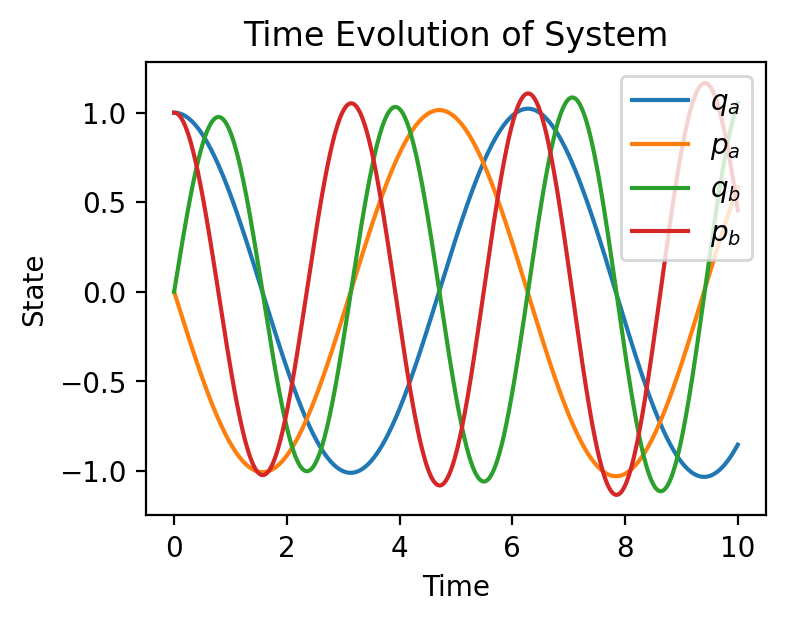

In [4]:
A_in = lambda t: 0
B_in = lambda t: 0
sys = DoubleModeSystem(params={},A_in = A_in)
x_0 = np.array([1,0,0,1])
ts = np.linspace(0, 10, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$","$q_b$","$p_b$"])
ax.legend()

print(sys.A)

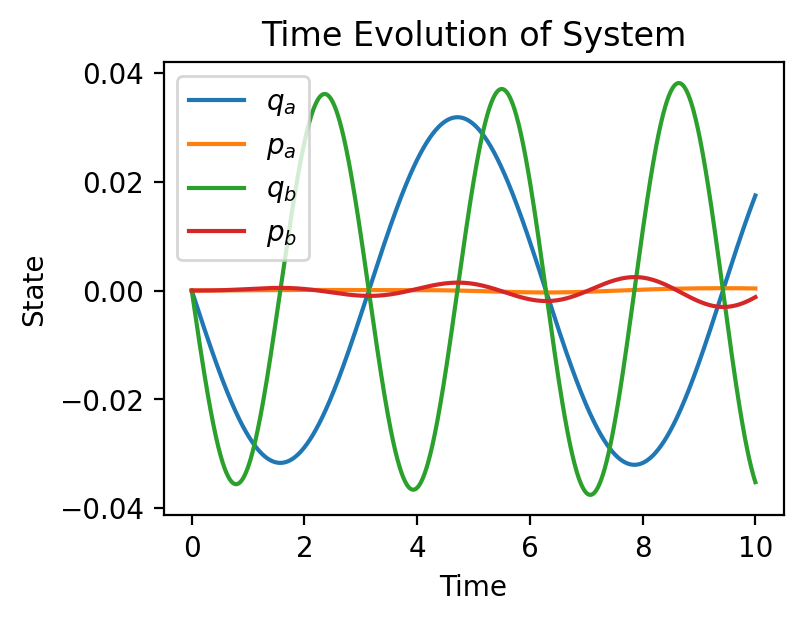

In [5]:
#default A_in, B_in is used
sys = DoubleModeSystem(params={})
x_0 = np.array([0,0,0,0])
ts = np.linspace(0, 10, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$","$q_b$","$p_b$"])
ax.legend()

In [6]:
u = sys.eval_u(0)
sys.eval_Jf(x_0, u)

array([[-1.5e-03,  1.0e+00,  0.0e+00,  2.0e-03],
       [-1.0e+00, -1.5e-03, -2.0e-03,  0.0e+00],
       [ 0.0e+00,  2.0e-03, -3.5e-03,  2.0e+00],
       [-2.0e-03,  0.0e+00, -2.0e+00, -3.5e-03]])

In [7]:
sys.eval_Jf_numerical(x_0, u)

array([[-1.49999999e-03,  1.00000000e+00,  0.00000000e+00,
         2.00000003e-03],
       [-1.00000000e+00, -1.50000000e-03, -2.00000000e-03,
         0.00000000e+00],
       [ 0.00000000e+00,  2.00000003e-03, -3.50000001e-03,
         2.00000000e+00],
       [-2.00000000e-03,  0.00000000e+00, -2.00000000e+00,
        -3.50000000e-03]])

# Linearization

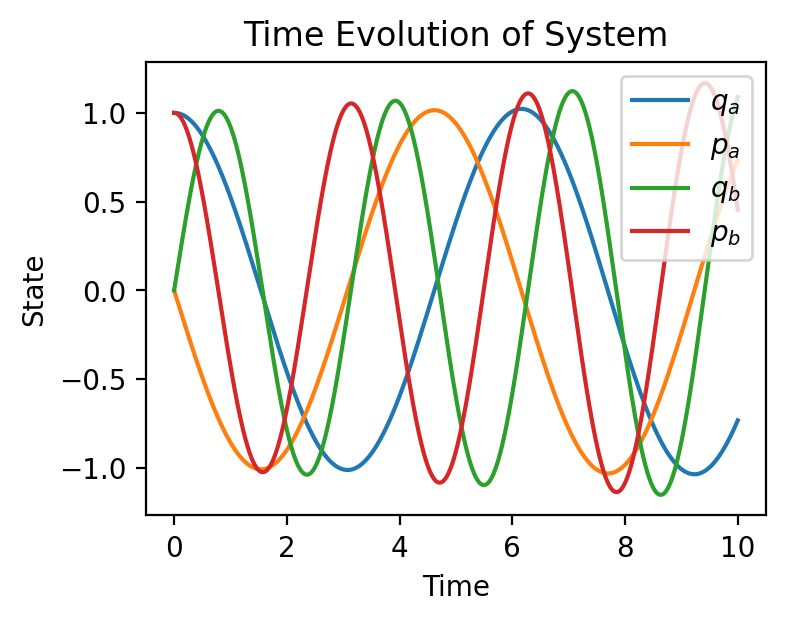

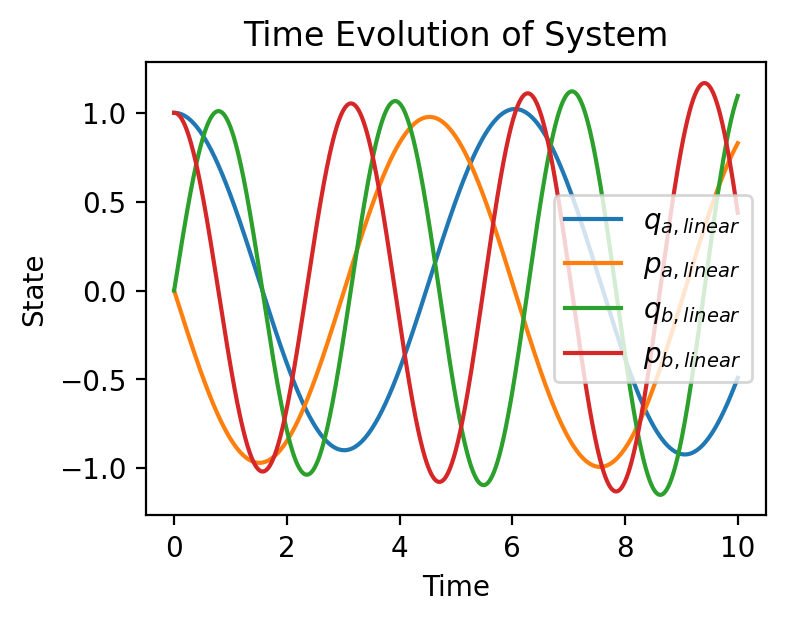

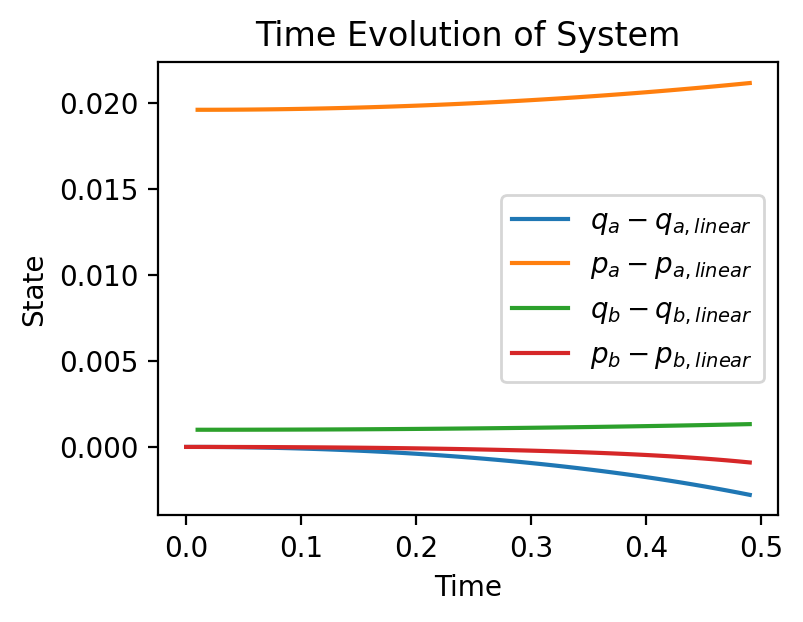

In [8]:
A_in = lambda t: 0
B_in = lambda t: 0
sys = DoubleModeSystem(params={"omega_a": 1, "kappa_a": 0.001, "kerr_a":0.01}, A_in = A_in, B_in = B_in)
x_0 = np.array([1,0, 0 , 1])
ts = np.linspace(0, 10, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$", "$q_b$","$p_b$"])
ax.legend()

X_linear = sys.forward_euler_linear(x_0, ts, x_0, 0)
fig, ax = plot_full_evolution(X_linear, ts, labels=["$q_{a,linear}$","$p_{a,linear}$","$q_{b,linear}$","$p_{b,linear}$"])

Delta_X = (X-X_linear)/X
plot_full_evolution(Delta_X[:,:50], ts[:50], labels=["$q_a - q_{a,linear}$","$p_a - p_{a,linear}$","$q_b - q_{b,linear}$","$p_b - p_{b,linear}$"])
ax.legend()